In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df["gender"]=pd.get_dummies(df["gender"])

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
corr_matrix=df.corr()
corr=corr_matrix["stroke"].sort_values(ascending=False)

In [16]:
corr

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
gender              -0.009027
Name: stroke, dtype: float64

In [20]:
df["bmi"]=df["bmi"].fillna(value=29)

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df["smoking_status"]=label_enc.fit_transform(df["smoking_status"])
df["work_type"]=label_enc.fit_transform(df["work_type"])
df["Residence_type"]=label_enc.fit_transform(df["Residence_type"])
df["ever_married"]=label_enc.fit_transform(df["ever_married"])

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,1,61.0,0,0,1,3,0,202.21,29.0,2,1
2,31112,0,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,1,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,3,0,174.12,24.0,2,1


In [27]:
corr_matrix=df.corr()
corr=corr_matrix["stroke"].sort_values(ascending=False)
corr

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.039327
smoking_status       0.028123
Residence_type       0.015458
id                   0.006388
gender              -0.009027
work_type           -0.032316
Name: stroke, dtype: float64

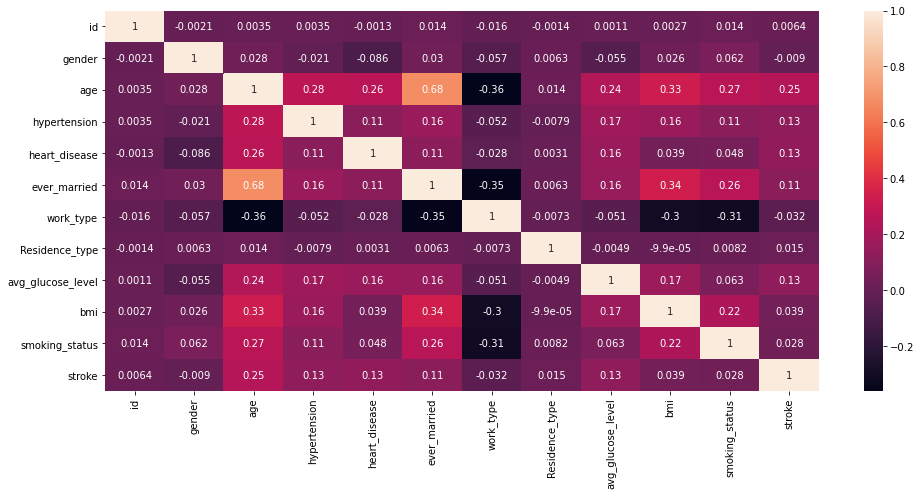

In [28]:
corr=df.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [29]:
x=df.drop(["stroke","work_type"],axis=1)

In [30]:
x.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,0,67.0,0,1,1,1,228.69,36.6,1
1,51676,1,61.0,0,0,1,0,202.21,29.0,2
2,31112,0,80.0,0,1,1,0,105.92,32.5,2
3,60182,1,49.0,0,0,1,1,171.23,34.4,3
4,1665,1,79.0,1,0,1,0,174.12,24.0,2


In [31]:
y=df["stroke"]

In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [33]:
x.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred=model.predict(x_test)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
y_test.head(10)

42      1
380     0
3524    0
352     0
4927    0
991     0
3885    0
3212    0
3055    0
4983    0
Name: stroke, dtype: int64

In [53]:
model.score(x_test,y_test)

0.9461839530332681

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
acc=accuracy_score(y_test,y_pred)

In [56]:
acc

0.9461839530332681

In [57]:
train_acc=accuracy_score(y_train,model.predict(x_train))

In [58]:
train_acc

0.951320939334638

In [59]:
cm=confusion_matrix(y_test,y_pred)

In [60]:
cm

array([[967,   1],
       [ 54,   0]], dtype=int64)